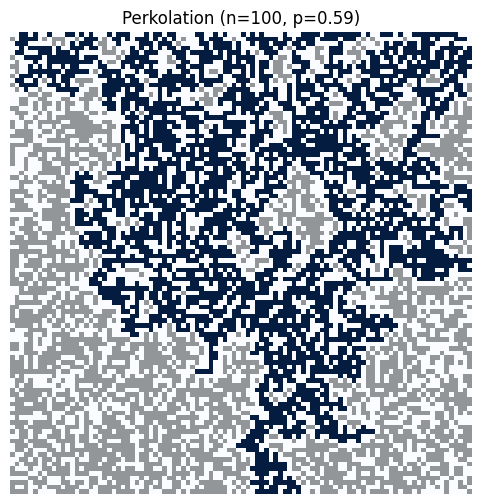

Wasser perkoliert bis zum Boden! (Durchgehender Pfad vorhanden)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def simulate_percolation(n=50, p=0.55):
    """
    n = Größe des Gitters (n x n)
    p = Wahrscheinlichkeit, dass eine Pore offen ist
    """
    # 1. Erzeuge ein zufälliges Gitter: True = offen, False = blockiert
    grid = np.random.rand(n, n) < p

    # 2. Flood-fill von oben starten (wie Wasser, das oben in den Filter läuft)
    wet = np.zeros_like(grid, dtype=bool)
    queue = deque()

    # Start: alle offenen Zellen der ersten Zeile
    for j in range(n):
        if grid[0, j]:
            wet[0, j] = True
            queue.append((0, j))

    # BFS / Flood-Fill
    while queue:
        x, y = queue.popleft()

        # Nachbarn (oben, unten, links, rechts)
        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            nx, ny = x + dx, y + dy

            # Check boundaries
            if 0 <= nx < n and 0 <= ny < n:
                if grid[nx, ny] and not wet[nx, ny]:
                    wet[nx, ny] = True
                    queue.append((nx, ny))

    return grid, wet


# --- Simulation starten ---
n = 100   # Filtergröße
p = 0.59   # Offenheits-Wahrscheinlichkeit (Perkolationsschwelle ≈ 0.59 beim 2D-Gitter)

grid, wet = simulate_percolation(n, p)

# --- Visualisieren ---
plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="Greys", interpolation="nearest")
plt.imshow(wet, cmap="Blues", alpha=0.6, interpolation="nearest")
plt.title(f"Perkolation (n={n}, p={p})")
plt.axis("off")
plt.show()

# --- Prüfen, ob Wasser unten angekommen ist ---
if wet[-1].any():
    print("Wasser perkoliert bis zum Boden! (Durchgehender Pfad vorhanden)")
else:
    print("Keine Perkolation (kein durchgehender Pfad).")


# Protokoll der Perkolations-Simulation

## 1. Parameter
- **Gittergröße**: `100 x 100` (d.h. 10.000 Zellen insgesamt)
- **Offenheits-Wahrscheinlichkeit**: `0.59`
  - Wahrscheinlichkeit, dass eine Zelle **offen** ist.
  - Perkolationsschwelle für ein zufälliges 2D-Gitter ist nahe bei 0.59.

## 2. Gittererstellung
- Das Gitter wird zufällig erstellt, wobei jede Zelle mit einer Wahrscheinlichkeit von 59 % **offen** ist und mit 41 % **blockiert**.
- Offene Zellen sind für das Wasser durchlässig, blockierte Zellen verhindern den Wasserfluss.
- Der Gitteraufbau ist **zufällig**, was zu unterschiedlichen Perkolationsmustern führt.

## 3. Flood-Fill (Breitensuche)
- **Start**: Der Flood-Fill-Prozess beginnt mit allen offenen Zellen der ersten Zeile.
- **Breitensuche (BFS)**: Der Algorithmus durchläuft alle benachbarten offenen Zellen und markiert sie als durchflutet.
- Die benachbarten Zellen werden in einer **Queue** gespeichert und der Prozess wiederholt sich, bis alle erreichbaren Zellen durchflutet sind.

## 4. Visualisierung
- **Graue Zellen**: Offene Zellen (durchlässig für Wasser)
- **Schwarze Zellen**: Blockierte Zellen (verhindern den Wasserfluss)
- **Blaue Zellen**: Zellen, die vom Wasser durchflutet wurden
- **Darstellung**: Das Gitter wird mit `matplotlib` visualisiert, wobei der Fortschritt des Wasserflusses sichtbar wird.

## 5. Ergebnis der Perkolation
- **Ergebnis**: Die Perkolation ist erfolgreich, wenn das Wasser den unteren Rand des Gitters erreicht hat.
- Das Skript prüft, ob **mindestens eine Zelle in der letzten Zeile** vom Wasser durchflutet wurde (`wet[-1].any()`).
- **Perkolation erfolgreich**: Wasser erreicht den Boden.
- **Keine Perkolation**: Wasser erreicht nicht den unteren Rand.

## 6. Zusammenfassung
- Wenn der Wasserfluss das Ende des Gitters erreicht, wird Perkolation festgestellt.
- Falls das Wasser in den unteren Bereich des Gitters gelangt, bedeutet dies, dass ein durchgehender Pfad existiert, der das Wasser von oben nach unten durchlässt.
- Wenn keine Zellen in der letzten Zeile vom Wasser erreicht werden, ist keine Perkolation aufgetreten.

---

### Log-Datei Beispiel:

